In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
data = pd.read_csv('response.csv')

In [3]:
len(data['QUESTION_TITLE'].unique())

2129

In [4]:
len(pd.DataFrame(data['QUESTION_TITLE'].unique()))

2129

In [5]:
dob_mask = data['QUESTION_TITLE'].str.contains('date of birth', case=False, na=False)
data_dob = data[dob_mask]

# 计算年龄
data_dob['Date of Birth'] = pd.to_datetime(data_dob['RESPONSES'], errors='coerce')
current_year = datetime.now().year
data_dob['Age'] = current_year - data_dob['Date of Birth'].dt.year

/var/folders/j6/02mk1mdd2_537vnvkvxzxld80000gn/T/ipykernel_41829/708486153.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data_dob['Date of Birth'] = pd.to_datetime(data_dob['RESPONSES'], errors='coerce')
/var/folders/j6/02mk1mdd2_537vnvkvxzxld80000gn/T/ipykernel_41829/708486153.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dob['Date of Birth'] = pd.to_datetime(data_dob['RESPONSES'], errors='coerce')
/var/folders/j6/02mk1mdd2_537vnvkvxzxld80000gn/T/ipykernel_41829/708486153.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [6]:
data_dob['Age'].describe()

count    185362.000000
mean         37.914211
std          15.348651
min         -55.000000
25%          27.000000
50%          36.000000
75%          48.000000
max         149.000000
Name: Age, dtype: float64

In [7]:
# data_dob.loc[(data_dob['Age'] < 0) | (data_dob['Age'] > 100)]

In [8]:
data_dob.loc[(data_dob['Age'] < 0) | (data_dob['Age'] > 100)] = np.nan

<Axes: xlabel='Age', ylabel='Count'>

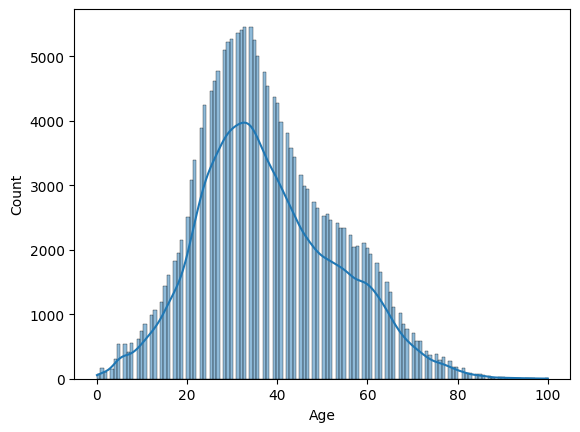

In [9]:
sns.histplot(data_dob['Age'].dropna(), kde=True)

In [10]:
# 筛选出性别数据并处理（同理可适用于性别）
gender_mask = data['QUESTION_TITLE'].str.contains('gender', case=False, na=False)
data_gender = data[gender_mask]
# data_gender['RESPONSES'].value_counts()

In [11]:
def classify_gender(RESPONSES):
    if isinstance(RESPONSES, str):
        if 'Female' in RESPONSES or 'Femme' in RESPONSES or 'Woman' in RESPONSES:
            return 'Female'
        elif 'Male' in RESPONSES or 'Man' in RESPONSES:
            return 'Male'
        else:
            return 'Other'
    
data_gender['RESPONSES'] = data_gender['RESPONSES'].dropna().astype(str)
data_gender['Gender'] = data_gender['RESPONSES'].apply(classify_gender)

/var/folders/j6/02mk1mdd2_537vnvkvxzxld80000gn/T/ipykernel_41829/1151640754.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gender['RESPONSES'] = data_gender['RESPONSES'].dropna().astype(str)
/var/folders/j6/02mk1mdd2_537vnvkvxzxld80000gn/T/ipykernel_41829/1151640754.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gender['Gender'] = data_gender['RESPONSES'].apply(classify_gender)


In [12]:
data_gender['Gender'].value_counts()

Female    139101
Male       64248
Other      10193
Name: Gender, dtype: int64

In [13]:
# occupation 
occupation_mask = data['QUESTION_TITLE'].str.contains('occupation', case=False, na=False)
data_occupation = data[occupation_mask]
# data_occupation['RESPONSES'].value_counts()

In [14]:
# pd.DataFrame(data_occupation['RESPONSES'].value_counts()).head(50)

In [15]:
occupation_mapping = {
    'Health Care': [
        'Health Care', 'RN/RPN', 'Health Care - Nurse, OT, PT, SW, etc',
        'Health care - other provider', 'Health care - Physician/medical learner',
        'Physician', 'Personal Support Worker', 'Nurse practitioner', 'Pharmacist',
        'Physiotherapist', 'Respiratory Therapist', 'Community Mental Health/Addiction worker', 
        'nurse'
    ],
    'First Responder': [
        'First Responder', 'First Responder / Public Safety', 'Paramedic', 
        'Military / Veteran'
    ],
    'Education': [
        'Education', 'Teacher', 'Academic'
    ],
    'Student': [
        'Student', 'student'
    ],
    'Unemployed': [
        'Unemployed', 'Retired', 'Homemaker'
    ],
    'Professional Services': [
        'Legal', 'Financial Services', 'Marketing', 'Engineering',
        'Arts', 'Media', 'Telecommunications' 
    ],
    'Manufacturing and Construction': [
        'Manufacturing', 'Construction', 'Energy', 'Tradesperson'
    ],
    'Administrative and Support Services': [
        'Secretarial', 'Administration/Clerical'
    ],
    'Other': [
        'Other', 'Other (Please Specify)', 'Autre'
    ]
}

def classify_occupation(RESPONSES):
    for category, keywords in occupation_mapping.items():
        if RESPONSES in keywords:
            return category
    return 'Other'

data_occupation['RESPONSES'] = data_occupation['RESPONSES'].dropna().astype(str)
data_occupation['Occupation'] = data_occupation['RESPONSES'].apply(classify_occupation)

/var/folders/j6/02mk1mdd2_537vnvkvxzxld80000gn/T/ipykernel_41829/3382108488.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_occupation['RESPONSES'] = data_occupation['RESPONSES'].dropna().astype(str)
/var/folders/j6/02mk1mdd2_537vnvkvxzxld80000gn/T/ipykernel_41829/3382108488.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_occupation['Occupation'] = data_occupation['RESPONSES'].apply(classify_occupation)


In [16]:
pd.DataFrame(data_occupation['Occupation'].value_counts())

,Occupation
Other,26507
Professional Services,15420
Health Care,10871
Student,10133
Unemployed,8260
Education,5814
Manufacturing and Construction,5084
First Responder,2747
Administrative and Support Services,1721


In [17]:
# 母语
language_mask = data['QUESTION_TITLE'].str.contains('Mother Tongue|first language', case=False, na=False)
data_language = data[language_mask]
# data_language['RESPONSES'].value_counts()

In [18]:
def classify_language(RESPONSES):
    if isinstance(RESPONSES, str):
        if 'English' in RESPONSES:
            return 'English'
        elif 'French' in RESPONSES:
            return 'French'
        else:
            return 'Other'
    
data_language['RESPONSES'] = data_language['RESPONSES'].dropna().astype(str)
data_language['Mother Tongue'] = data_language['RESPONSES'].apply(classify_language)

/var/folders/j6/02mk1mdd2_537vnvkvxzxld80000gn/T/ipykernel_41829/2138662764.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_language['RESPONSES'] = data_language['RESPONSES'].dropna().astype(str)
/var/folders/j6/02mk1mdd2_537vnvkvxzxld80000gn/T/ipykernel_41829/2138662764.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_language['Mother Tongue'] = data_language['RESPONSES'].apply(classify_language)


In [19]:
data_language['Mother Tongue'].value_counts()

English    20292
French      1866
Other       1276
Name: Mother Tongue, dtype: int64

In [20]:
# Ethnicity
ethnicity_mask = data['QUESTION_TITLE'].str.contains('Ethnicity', case=False, na=False)
data_ethnicity = data[ethnicity_mask]
# data_ethnicity['RESPONSES'].value_counts()

In [21]:
def classify_ethnicity(RESPONSES):
    if isinstance(RESPONSES, str):
        ethnicity_mapping = {
            'Asian': ['Asian', 'Chinese', 'Filipino'],
            'Black': ['Black'],
            'White': ['White', 'Caucasian'],
            'Indigenous': ['Indigenous', 'First Nations', 'Metis', 'Inuit', 'Indian'],
            'Latin American': ['Latin American'],
            'Middle Eastern': ['Middle Eastern'],
            'Mixed Heritage': ['Mixed Heritage', 'Mixed Race'],
            'Do Not Know': ['Unknown', 'Do Not Know'],
            'Prefer Not To Answer': ['Prefer Not To Answer', 'Prefer not to answer']
        }

        if ',' in RESPONSES:
            if '(' not in RESPONSES:
                return 'Mixed Heritage'
            
        for category, keywords in ethnicity_mapping.items():
            if any(keyword in RESPONSES for keyword in keywords):
                return category

    return 'Other'

data_ethnicity['RESPONSES'] = data_ethnicity['RESPONSES'].dropna().astype(str)    
data_ethnicity['Ethnicity'] = data_ethnicity['RESPONSES'].apply(classify_ethnicity)

/var/folders/j6/02mk1mdd2_537vnvkvxzxld80000gn/T/ipykernel_41829/486498126.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ethnicity['RESPONSES'] = data_ethnicity['RESPONSES'].dropna().astype(str)
/var/folders/j6/02mk1mdd2_537vnvkvxzxld80000gn/T/ipykernel_41829/486498126.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ethnicity['Ethnicity'] = data_ethnicity['RESPONSES'].apply(classify_ethnicity)


In [22]:
data_ethnicity['Ethnicity'].value_counts()

White                   15445
Mixed Heritage           1270
Indigenous               1109
Asian                     807
Black                     690
Prefer Not To Answer      616
Do Not Know               564
Middle Eastern            408
Latin American            232
Other                      78
Name: Ethnicity, dtype: int64

In [23]:
# 自杀
suicide_mask = data['QUESTION_TITLE'].str.contains('suicide', case=False, na=False)
data_suicide = data[suicide_mask]
# data_suicide['RESPONSES'].value_counts()

In [24]:
def classify_suicide(RESPONSES):
    if isinstance(RESPONSES, str):
        if 'False' in RESPONSES or 'No' in RESPONSES:
            return 'False'
        else:
            return'True'

data_suicide['RESPONSES'] = data_suicide['RESPONSES'].dropna().astype(str)
data_suicide['Suicide Attempt'] = data_suicide['RESPONSES'].apply(classify_suicide)

/var/folders/j6/02mk1mdd2_537vnvkvxzxld80000gn/T/ipykernel_41829/856511479.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_suicide['RESPONSES'] = data_suicide['RESPONSES'].dropna().astype(str)
/var/folders/j6/02mk1mdd2_537vnvkvxzxld80000gn/T/ipykernel_41829/856511479.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_suicide['Suicide Attempt'] = data_suicide['RESPONSES'].apply(classify_suicide)


In [25]:
data_suicide['Suicide Attempt'].value_counts()

False    41068
True     15484
Name: Suicide Attempt, dtype: int64

In [26]:
# 暴力
violent_mask = data['QUESTION_TITLE'].str.contains('violent behaviour', case=False, na=False)
data_violent = data[violent_mask]
# data_violent['RESPONSES'].value_counts()

In [27]:
def classify_violent(RESPONSES):
    if isinstance(RESPONSES, str):
        if 'False' in RESPONSES or 'No' in RESPONSES or 'no' in RESPONSES or 'denies' in RESPONSES:
            return 'False'
        else:
            return 'True'

data_violent['RESPONSES'] = data_violent['RESPONSES'].dropna().astype(str)
data_violent['Violent Behaviour'] = data_violent['RESPONSES'].apply(classify_violent)

/var/folders/j6/02mk1mdd2_537vnvkvxzxld80000gn/T/ipykernel_41829/3415218870.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_violent['RESPONSES'] = data_violent['RESPONSES'].dropna().astype(str)
/var/folders/j6/02mk1mdd2_537vnvkvxzxld80000gn/T/ipykernel_41829/3415218870.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_violent['Violent Behaviour'] = data_violent['RESPONSES'].apply(classify_violent)


In [28]:
data_violent['Violent Behaviour'].value_counts()

False    16500
True      1094
Name: Violent Behaviour, dtype: int64

In [29]:
# 自残
selfharm_mask = data['QUESTION_TITLE'].str.contains('Self-Harm', case=False, na=False)
data_selfharm = data[selfharm_mask]
# data_selfharm['RESPONSES'].value_counts()

In [30]:
data_selfharm['RESPONSES'] = data_selfharm['RESPONSES'].dropna().astype(str)
data_selfharm['Deliberate Self-Harm'] = data_selfharm['RESPONSES'].apply(classify_violent)
data_selfharm['Deliberate Self-Harm'].value_counts()

/var/folders/j6/02mk1mdd2_537vnvkvxzxld80000gn/T/ipykernel_41829/214816562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selfharm['RESPONSES'] = data_selfharm['RESPONSES'].dropna().astype(str)
/var/folders/j6/02mk1mdd2_537vnvkvxzxld80000gn/T/ipykernel_41829/214816562.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selfharm['Deliberate Self-Harm'] = data_selfharm['RESPONSES'].apply(classify_violent)


False    41007
True      3105
Name: Deliberate Self-Harm, dtype: int64

In [31]:
# 屠杀
homicidal_mask = data['QUESTION_TITLE'].str.contains('Homicidal Threats', case=False, na=False)
data_homicidal = data[homicidal_mask]
# data_homicidal['RESPONSES'].value_counts()

In [32]:
data_homicidal['RESPONSES'] = data_homicidal['RESPONSES'].dropna().astype(str)
data_homicidal['Homicidal Threats'] = data_homicidal['RESPONSES'].apply(classify_violent)
data_homicidal['Homicidal Threats'].value_counts()

/var/folders/j6/02mk1mdd2_537vnvkvxzxld80000gn/T/ipykernel_41829/1493260969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_homicidal['RESPONSES'] = data_homicidal['RESPONSES'].dropna().astype(str)
/var/folders/j6/02mk1mdd2_537vnvkvxzxld80000gn/T/ipykernel_41829/1493260969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_homicidal['Homicidal Threats'] = data_homicidal['RESPONSES'].apply(classify_violent)


False    16836
True       255
Name: Homicidal Threats, dtype: int64

In [33]:
# 暴力经历
expviolence_mask = data['QUESTION_TITLE'].str.contains('Experiencing Violence', case=False, na=False)
data_expviolence = data[expviolence_mask]
data_expviolence['Experiencing Violence'] = data['RESPONSES']

data_expviolence['Experiencing Violence'].value_counts()

/var/folders/j6/02mk1mdd2_537vnvkvxzxld80000gn/T/ipykernel_41829/784802172.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_expviolence['Experiencing Violence'] = data['RESPONSES']


False    15574
True      1234
Name: Experiencing Violence, dtype: int64

In [34]:
demographic = data_dob[['PATIENT_ID', 'Age']].merge(
    data_gender[['PATIENT_ID', 'Gender']],
    on='PATIENT_ID',
    how='outer'
).merge(
    data_occupation[['PATIENT_ID', 'Occupation']],
    on='PATIENT_ID',
    how='outer'
).merge(
    data_language[['PATIENT_ID', 'Mother Tongue']],
    on='PATIENT_ID',
    how='outer'
).merge(
    data_ethnicity[['PATIENT_ID', 'Ethnicity']],
    on='PATIENT_ID',
    how='outer'
).merge(
    data_suicide[['PATIENT_ID', 'Suicide Attempt']],
    on='PATIENT_ID',
    how='outer'
).merge(
    data_violent[['PATIENT_ID', 'Violent Behaviour']],
    on='PATIENT_ID',
    how='outer'
).merge(
    data_selfharm[['PATIENT_ID', 'Deliberate Self-Harm']],
    on='PATIENT_ID',
    how='outer'
).merge(
    data_homicidal[['PATIENT_ID', 'Homicidal Threats']],
    on='PATIENT_ID',
    how='outer'
).merge(
    data_expviolence[['PATIENT_ID', 'Experiencing Violence']],
    on='PATIENT_ID',
    how='outer'
)


In [35]:
# demographic.to_csv('demographic.csv', index=False)

large clinic customers, patients tables, understand the quetions tiles, decide what question could be predictors

previous mental health/treatment/therepist

not complete assessment, filter score is not know

how many missing assessment, miss score, miss assessment

predictors high TA



<Axes: >

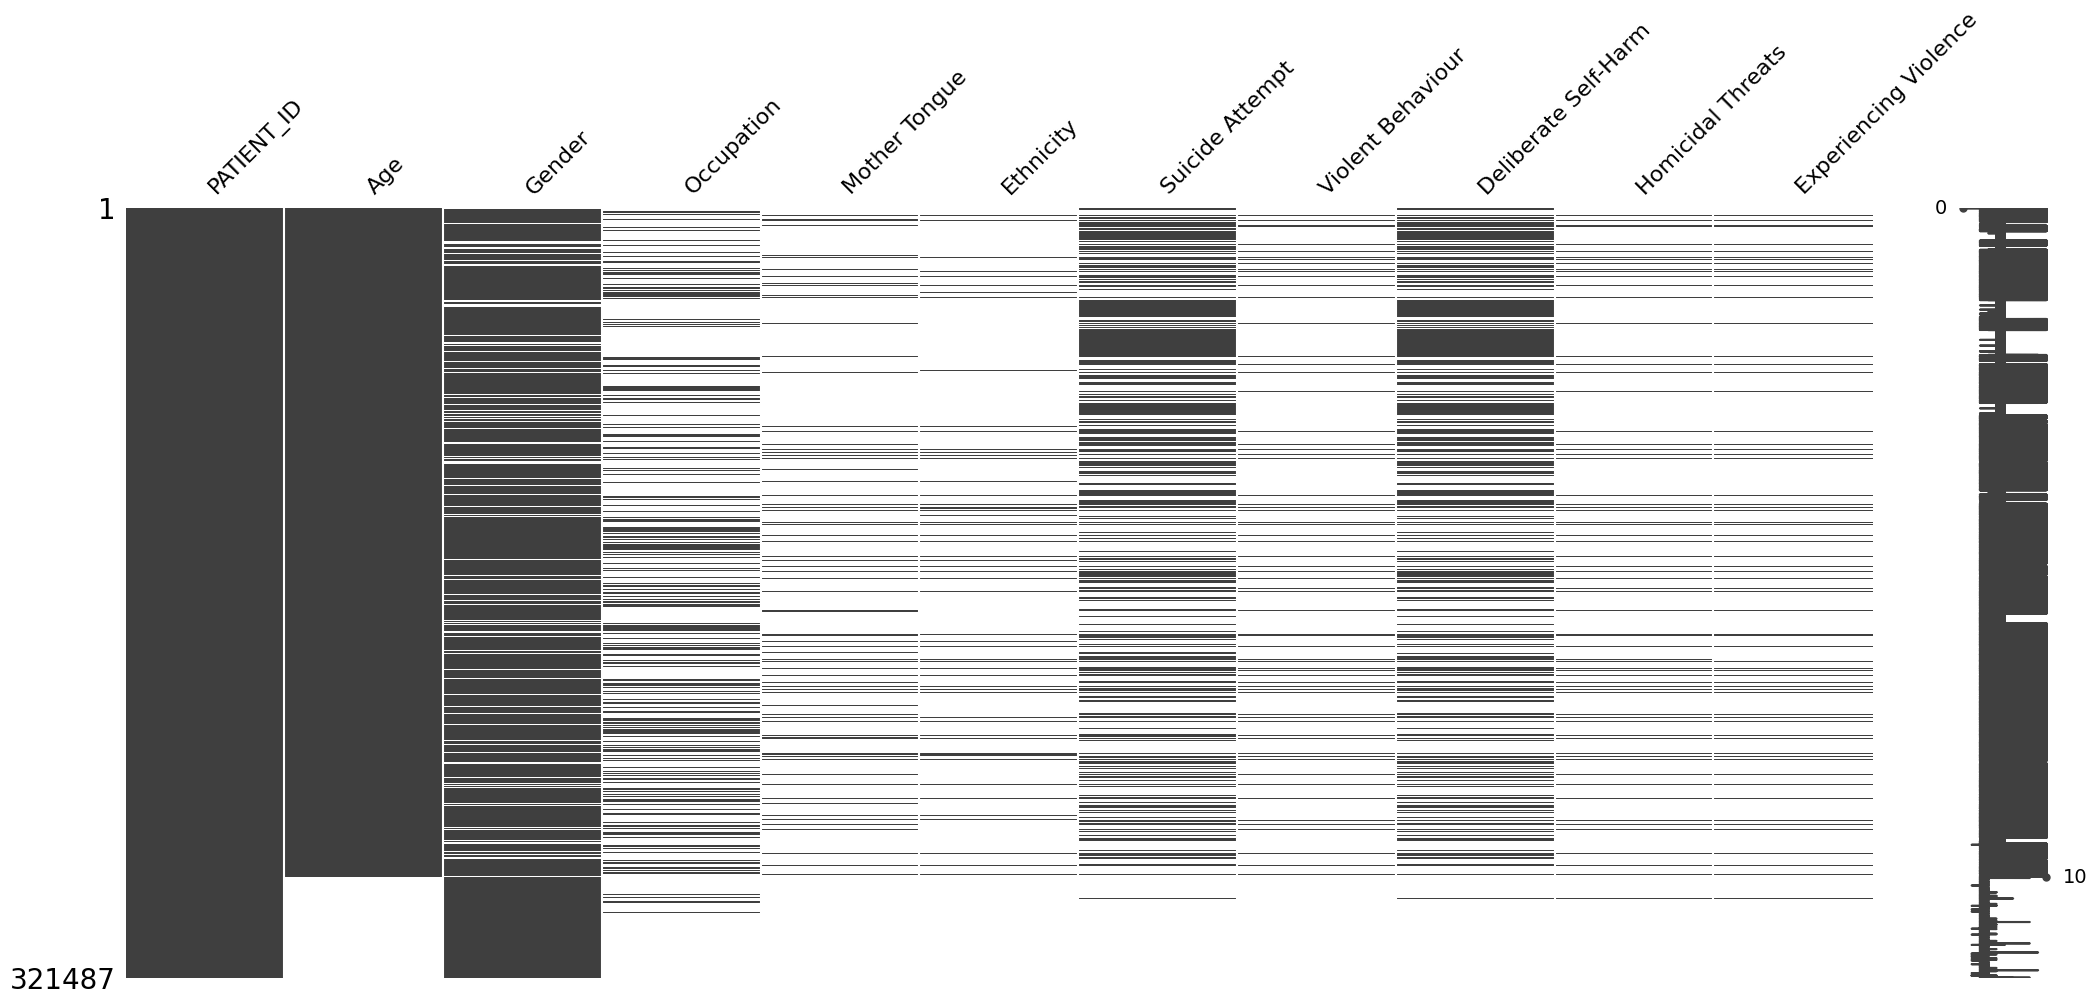

In [36]:
# nan
import missingno as msno 
msno.matrix(demographic)

<Axes: >

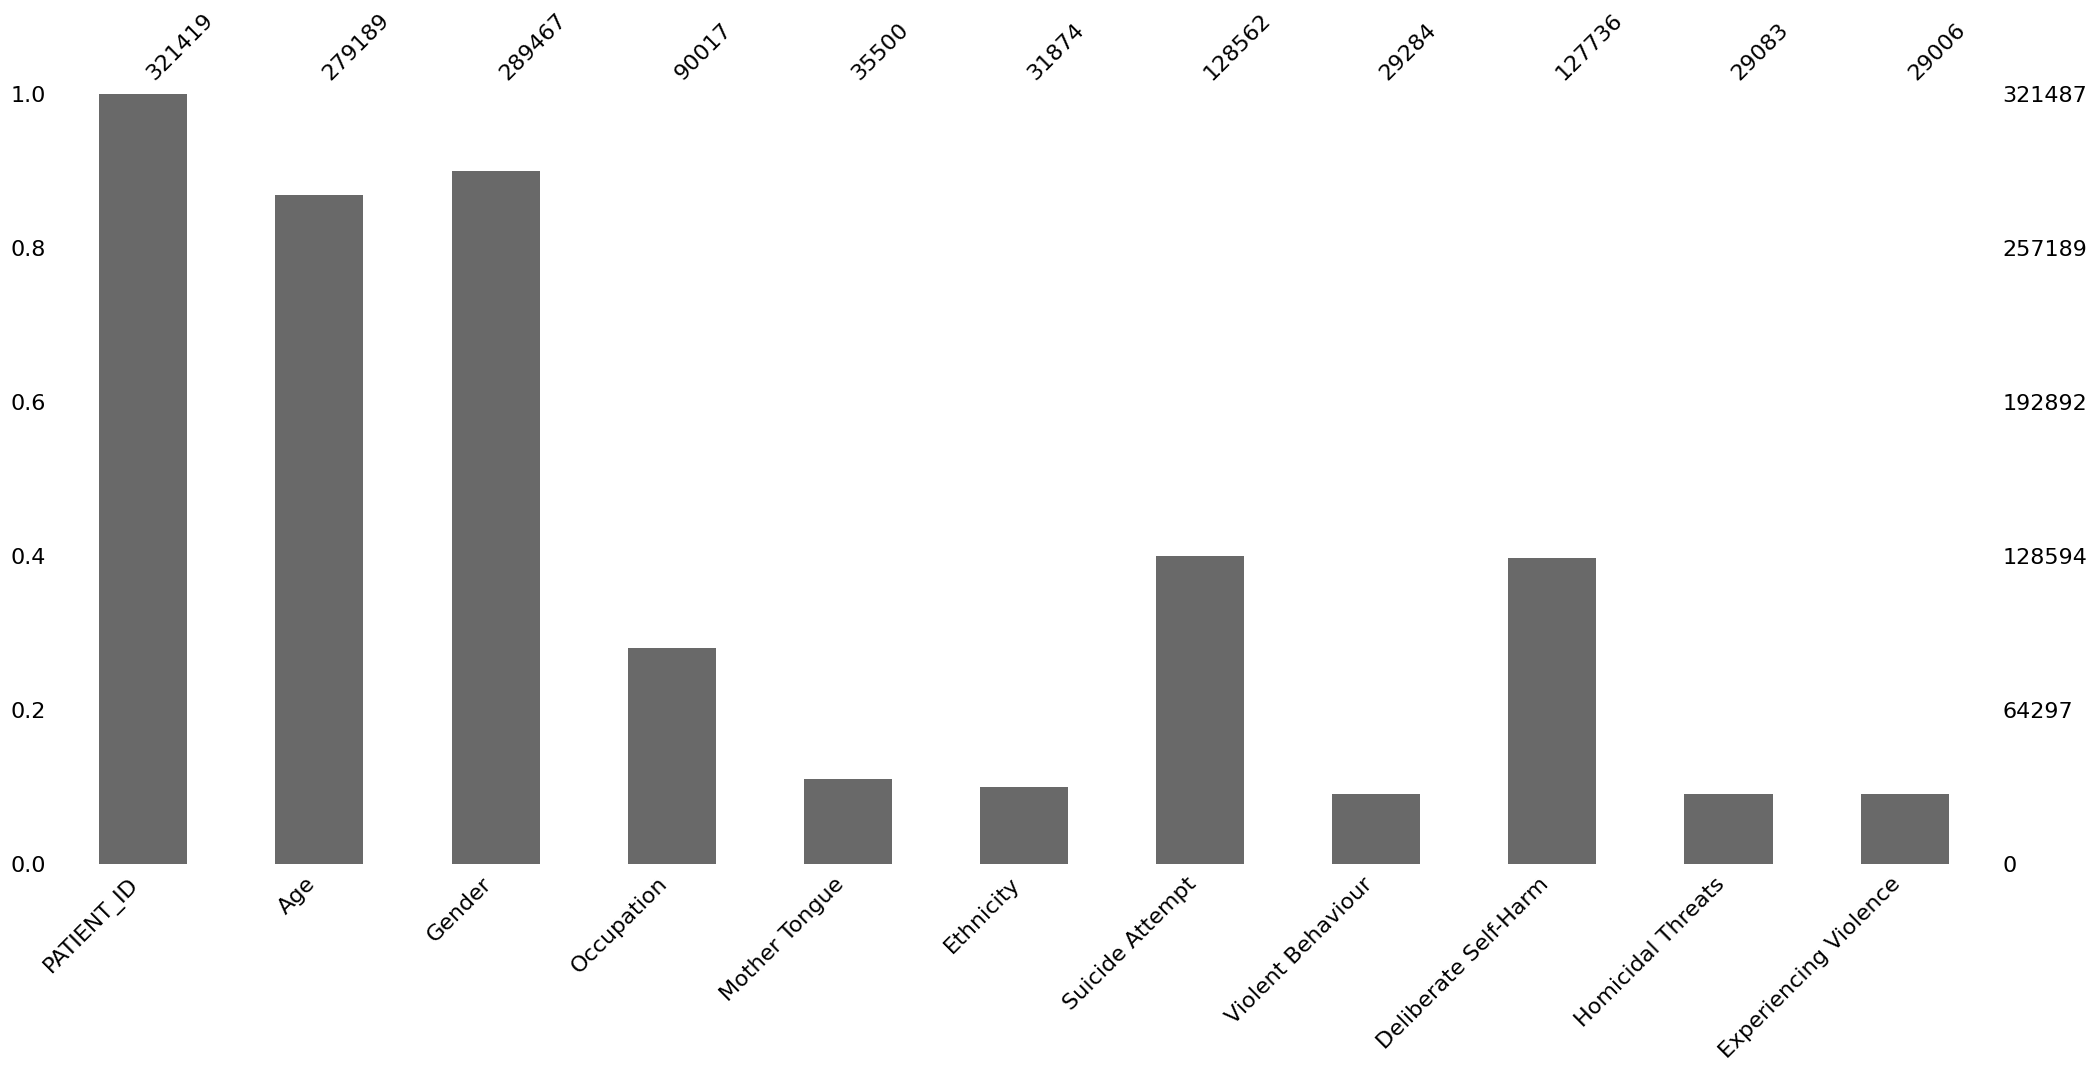

In [37]:
msno.bar(demographic) 